## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)
- [Resources](#resources)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# reading csv file
df = pd.read_csv('ab_data.csv')

# checking a few rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# checking number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
# checking number of unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [113]:
# checking proportions of converted users
prop_converted_us = df[df['converted']==1]['user_id'].count()/df['user_id'].count()

prop_converted_us

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [116]:
# dataframe for new_page
df_new_page = df[df['landing_page']=='new_page']

#OK
df_new_page_treat = df_new_page[df_new_page['group']=='treatment']

# NOT OK
df_new_page_contr = df_new_page[df_new_page['group']=='control']

# dataframe for old_page

df_old_page = df[df['landing_page']=='old_page']

# NOT OK
df_old_page_treat = df_old_page[df_old_page['group']=='treatment']

#OK
df_old_page_contr = df_old_page[df_old_page['group']=='control']

# checking numbers of all groups
df_new_page_treat['user_id'].count(), df_new_page_contr['user_id'].count(), df_old_page_treat['user_id'].count(), df_old_page_contr['user_id'].count()

(145311, 1928, 1965, 145274)

In [117]:
# number of incorrect data rows 

df_new_page_contr['user_id'].count() + df_old_page_treat['user_id'].count()

3893

f. Do any of the rows have missing values?

In [119]:
# checking null values 

df.isnull().count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# making copy of dataframe
df2 = df.copy()

# preparing list of indexes
index_list = df2.index[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page'))== False].tolist()

# dropping incorrect rows
df2.drop(index_list, inplace=True)

# checking number of rows after dropping
df2['user_id'].count()

290585

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# checking number of unique users

df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# checking duplicated user_id

df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
# showing rows for duplicated user_id

df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# preparing index number

index_list_2 = df2.index[df2['user_id'].duplicated()]

# dropping row from inxed_list_2

df2.drop(index_list_2, inplace=True)

# checking if there are more duplicates

df2['user_id'].duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# counting the probability of converted visits

p_conv = df2[df2['converted']==1]['user_id'].count()/df2['user_id'].count()

p_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# creating dataframe with control group 

df_control = df2[df2['group']=='control']

In [17]:
# given that control group, what is the probability they converted

p_conv_given_control_gr = df_control[df_control['converted']==1]['user_id'].count()/df_control['user_id'].count()

p_conv_given_control_gr

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# creating dataframe with treatment group

df_treatment = df2[df2['group']=='treatment']

In [19]:
# given that treatment group, what is the probability they converted

p_conv_given_treatment_gr = df_treatment[df_treatment['converted']==1]['user_id'].count()/df_treatment['user_id'].count()

p_conv_given_treatment_gr

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# counting the probability of reciving the new_page

p_treatment = df_treatment['user_id'].count()/df2['user_id'].count()

p_treatment

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [106]:
# counting difference in the observed sample

obs_diff = p_conv_given_treatment_gr - p_conv_given_control_gr

obs_diff

-0.0015782389853555567

**From results given above it seems that new treatment page has worse conversion rate than the old one. Because difference is less than 0. But this results are not statistically sufficient.**

**It is nessesary to test hypothesis <br><br>
$H0: $ $p_{new}$ - $p_{old}$ <= 0 and $H1:$ $p_{new}$ - $p_{old}$ > 0 <br><br>
in order to get statistical sufficent result and could answer this question.**

##### Conclusion: There is no sufficient evidence, that new treatement page leads to more conversions. This hypotesis needs more investigation.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**As metnion above the hypotesis should looks like:<br><br>**

$H0:$ $p_{new}$ - $p_{old}$ $<= 0$ <br><br>
$H1:$ $p_{new}$ - $p_{old}$ $> 0$ <br><br>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# counting convertion rate for p_new

p_new = df2[df2['converted']==1]['user_id'].count()/df2['user_id'].count()

p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
# counting convertion rate for p_old

p_old = df2[df2['converted']==1]['user_id'].count()/df2['user_id'].count()

p_old

0.11959708724499628

In [59]:
# counting difference in convertion rates

obs_diff = p_new - p_old

obs_diff

0.0

c. What is $n_{new}$?

In [24]:
# counting n_new

n_new = df2[df2['group'] == 'treatment']['user_id'].count()

n_new

145310

d. What is $n_{old}$?

In [25]:
# counting n_old

n_old = df2[df2['group'] == 'control']['user_id'].count()

n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [33]:
# simulation for p_new

new_page_converted = np.random.choice([0,1], p=[0.8805, 0.1195], size=[1,n_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [34]:
# simulation for p_old 

old_page_converted = np.random.choice([0,1], p=[0.8805, 0.1195], size=[1,n_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [35]:
# difference in simulated values

difference = new_page_converted.mean() - old_page_converted.mean()

difference

-0.0002154268421711708

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [63]:
# 10000 simulations for difference of p_new and p_old

p_diffs = []
for i in range (0,10000):
    new_page_converted = np.random.choice([0,1], p=[0.8805, 0.1195], size=[1,n_new])
    old_page_converted = np.random.choice([0,1], p=[0.8805, 0.1195], size=[1,n_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

In [64]:
# putting simulated data in numpy array

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

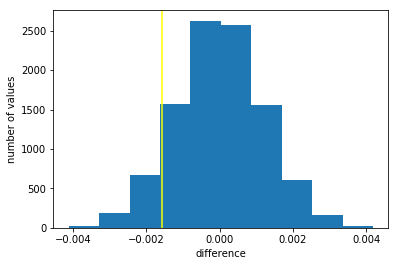

In [112]:
# plotting histogram for simulated data

plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='yellow');
plt.xlabel('difference');
plt.ylabel('number of values');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [107]:
# counting p_value

p_value = (p_diffs > obs_diff).mean()

p_value

0.9057

In [108]:
# checking test result

test_result = (p_value < 0.05)

test_result

False

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j I've calculated p_value for our hypotesis test. It is probability of observing our statistics if the null hypothesis is true. <br><br>
It is a fact, that p_value is greater then our level of errors type 1 equal $alpha=0.05$
. <br><br>
Regarding test result shown above we can not reject null hypothesis that the conversion rate of the new page is less or equal to the conversion rate of the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [72]:
import statsmodels.api as sm

# creating dataframe for control group

df_control = df2[df2['group']=='control']

# creating dataframe for treatment group

df_treatment = df2[df2['group']=='treatment']

# counting number of conversions in control group

convert_old = df_control[df_control['converted']==1]['user_id'].count()

# counting number of conversions in treatment group

convert_new = df_treatment[df_treatment['converted']==1]['user_id'].count()

# counting number of users that recived old page

n_old = df2[df2['group'] == 'control']['user_id'].count()

# counting number of users that recived new page

n_new = df2[df2['group'] == 'treatment']['user_id'].count()

In [73]:
# checking results

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [74]:
# calculating test statisitic and p_value

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='larger')

In [75]:
# checking results

z_score, p_value

(1.3109241984234394, 0.09494168724097551)

In [76]:
# importing scipy

from scipy.stats import norm

In [77]:
# using the normal cumulative distribution function

norm.cdf(z_score)

0.9050583127590245

In [79]:
# calculating critical value for our z-test

critical_value = norm.ppf(1-(0.05/2))

critical_value

1.959963984540054

In [80]:
# checking test result

test_result_2 = (z_score > critical_value)

test_result_2

False

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The result from z-test (saved in variable z_score) is not greater than critical value for z-test with  95% confidence. <br><br>
We can not reject null hypothesis that the conversion rate of the new page is less or equal to the conversion rate of the old page.<br><br>
This result agreed with previous one.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should perform the logistic regression, because we have 0/1 values in the dataset (0 means NOT CONVERTED and 1 means CONVERTED).**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [120]:
# checking a few rows

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [82]:
# adding intercept column

df2['intercept']=1

# checking a few rows

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [93]:
# adding columns from get_dummies

df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])

# checking a few rows

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [94]:
# dropping one of the columns added in previous step

df2 = df2.drop('control', axis=1)

# checking a few rows

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [95]:
# preparing the regression model 

log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [96]:
# showing regression model summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        23:10:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**P-value associated with ab_page is equal 0.190 <br><br>
P-value is different, because we are testing different hypothesis. <br><br> 
In previous test we have assumed that our null hypotesis will check if difference of conversions rates for the new and the old page is less or equal zero.<br><br> 
In this case the logical regression allows us to test hypothesis about situation that conversion rates are equal.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding new columns to our model can provide to situation in which our test will be statistical sufficient.<br><br>
For example, we can analyze the day of the week or part of the day the page was displayed. Exploring if user is new or not could be also helpful in our case study.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [97]:
# joining new dataset with the old one

countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')


In [98]:
# checking a few rows

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [100]:
# checking unique values for 'country' column

df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [102]:
### Create the necessary dummy variables

# adding columns from get_dummies

df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [103]:
# droping one of the columns added in previous step

df_new = df_new.drop('CA', axis=1)

# checking a few rows

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [104]:
### Fit Your Linear Model And Obtain the Results

# preparing the regression model 

log_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [105]:
# showing regression model summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        01:41:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**Adding new columns have changed p_value assosiated with ab_page about 0.001, now it is equal 0.191. <br><br>
This means that it's still not statisticaly significant. We can told the same about the rest of the factors - they are not statisticaly significant.**

<a id='conclusions'></a>
## Conclusions

**All methods shown in this notebook idicates that we can not reject null hypothesis. <br><br>
We don't have evidence that the new page has better conversion rate then the old page. <br><br>
Costs of implementing new page could be bigger then expected profit from increase of conversion rate. <br><br>
Taking all this together I would not recommend to launch new page on production environment.**

<a id='resources'></a>
## Resources

Materials mentioned in Udacity lessons <br>
https://www.tutorialspoint.com/scipy/scipy_stats.htm <br>
http://knowledgetack.com/python/statsmodels/proportions_ztest/ <br>